# ¡Vamos a ver cómo llena ese carrito del súper!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Descripción de los datos

Los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` .  Se verifico la información para cada DataFrame creado.


## Plan de solución

Descripción de los datos.

Se reviso si todos los archivos son .csv o .excel. Se importar la libreía de pandas as pd., se usa .csv, pd.read_csv() para leer los DataFrames, se utilizo .info() para tener un panorama en general de los datos. 

In [1]:
import pandas as pd # importar librerías

from matplotlib import pyplot as plt


In [2]:
df_instacart_orders= pd.read_csv("/datasets/instacart_orders.csv", sep= ";") # Se leen los archivos mediante pd.read_csv y se coloca el mismo nombre que tienen para evitar confusiones.

df_products= pd.read_csv("/datasets/products.csv", sep= ";")#se agrega el "sep=" para quitar como separacion ";".

df_aisles= pd.read_csv("/datasets/aisles.csv", sep= ";")

df_departments= pd.read_csv("/datasets/departments.csv", sep= ";")

df_order_products= pd.read_csv("/datasets/order_products.csv", sep= ";")# leer conjuntos de datos en los DataFrames


In [3]:
#se muestra DataFrame df_instacart_orders
df_instacart_orders.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
df_instacart_orders.describe() 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [6]:
#se muestra DataFrame df_products
df_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
df_products.describe() 

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [9]:
#se muestra DataFrame df_aisles
df_aisles.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
df_aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [12]:
#se muestra DataFrame df_departments
df_departments.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [13]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [14]:
df_departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [15]:
#se muestra DataFrame df_order_products
df_order_products.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [16]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [17]:
df_order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Se utilizó el parámetro "sep=" para eliminar ";" y en los 5 archivos de tipo .csv que están relacionados con el Id de producto, Id de pasillo, Id de departamento, entre otros. Esta relación nos permite conectar y combinar la información para obtener una mejor comprensión de los datos. Además, los DataFrames muestran el mismo número de entradas no nulas que el número total de entradas, lo cual es un buen indicador de que no tenemos información faltante. Sin embargo, para estar seguros, se revisará cada uno en busca de faltantes, duplicados o alguna anomalía.

# Preprocesamiento de los datos

Se procesaron los datos de la siguiente manera:

- Verifico y corrigo los tipos de datos (por ejemplo, la columnas de ID son números enteros).
- Se identifico y completaron los valores ausentes.
- Se identifico y eliminaron los valores duplicados.


## Plan de solución

Preprocesamiento de los datos.

Para asegurar que los datos sean precisos, se procedió a depurar y revisar los números enteros (int), los valores ausentes (isna) y los duplicados (duplicated) contenidos en los DataFrames.

## Se buscan y elimina los valores duplicados.

### `orders` data frame

In [18]:
# se revisó si hay pedidos duplicados
df_instacart_orders.duplicated() 


0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

In [19]:
#se dete3ctaron 15 duplicados con la función "sum"
df_instacart_orders.sum()

order_id                  8.190081e+11
user_id                   4.931757e+10
order_number              8.218024e+06
order_dow                 1.329161e+06
order_hour_of_day         6.440514e+06
days_since_prior_order    4.997431e+06
dtype: float64

In [20]:

df_instacart_orders[df_instacart_orders['user_id'] == 1].sort_values(by="order_id")


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Se cuenta con 15 duplicados, tanto en la columna "order_id" como en "user_id",  el miércoles a las 2:00 am

In [21]:

# Se verificó todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart_orders[(df_instacart_orders["order_dow"]==3) & (df_instacart_orders["order_hour_of_day"]==2)]  



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Esto sugiere que hay 121 pedidos de los cuales 15 son repetidos, del miércoles a las 2:00am, por lo que se aprecia un 12.40% de ordenes duplicadas.

## Se eliminan los pedidos duplicados.



In [22]:
df_instacart_orders.drop_duplicates(inplace=True)

# Se verifica si hay filas duplicadas
duplicates_exist = df_instacart_orders.duplicated().sum()
print(duplicates_exist)

0


In [23]:
df_instacart_orders.drop_duplicates(inplace=True)

# Verificar si hay filas duplicadas
duplicates_exist = df_instacart_orders.duplicated().sum()
duplicates_order_id = df_instacart_orders.duplicated(subset=['order_id']).sum()
print(duplicates_order_id)

0




Los 15 duplicados, que representa el 12.40% . Se eliminaron los duplicados usando .drop_duplicates()

### `products` data frame

In [24]:
df_products["product_name"]

0                               Chocolate Sandwich Cookies
1                                         All-Seasons Salt
2                     Robust Golden Unsweetened Oolong Tea
3        Smart Ones Classic Favorites Mini Rigatoni Wit...
4                                Green Chile Anytime Sauce
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object

In [25]:
df_products["product_name"] = df_products["product_name"].str.upper()
products_duplicates = df_products.duplicated()
products_duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool

In [26]:
products_duplicates = df_products.duplicated()
print(products_duplicates)

department_duplicates = df_products.duplicated(subset=["department_id"])
print(department_duplicates.sum())


0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool
49673


In [27]:
# Se revisó únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
product_duplicates = df_products.duplicated(subset=["product_name"])
print(product_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


In [28]:
df_products[df_products.duplicated(subset=["product_name"])]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [29]:
#Se comprueba que HIGH PERFORMANCE ENERGY DRINK esta repetida
df_products[df_products["product_name"]=="HIGH PERFORMANCE ENERGY DRINK"] 


,product_id,product_name,aisle_id,department_id
22540,22541,HIGH PERFORMANCE ENERGY DRINK,64,7
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7


In [30]:
# Se verifica cuantas veces a parece cada nombre repetido
df_products["product_name"].value_counts()

GREEN TEA WITH GINSENG AND HONEY                                                                                  3
PREMIUM LUBRICANT CONDOMS ENZ                                                                                     2
POTATOES O'BRIEN WITH ONIONS AND PEPPERS                                                                          2
TENDER WHITE MEAT CHICKEN- VEGETABLES & RICE IN A CHEDDAR CHEESE SAUCE GRANDMA'S CHICKEN & VEGETABLE RICE BAKE    2
CINNAMON ROLLS WITH ICING                                                                                         2
                                                                                                                 ..
KETTLE COOKED WAFFLE CUT BUFFALO CHEDDAR POTATO CHIPS                                                             1
STRAWBERRY BANANA PEACH LIGHT & FIT NONFAT YOGURT                                                                 1
RELAXING BEAUTY BAR SOAP WITH CALMING LAVENDER                          

In [31]:
# elimino duplicados
df_products= df_products.drop_duplicates(subset=["product_name"])
df_products

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13
...,...,...,...,...
49683,49684,VODKA- TRIPLE DISTILLED- TWIST OF VANILLA,124,5
49684,49685,EN CROUTE ROAST HAZELNUT CRANBERRY,42,1
49685,49686,ARTISAN BAGUETTE,112,3
49686,49687,SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD,41,8


In [32]:
#revisó que no tenga duplicados
df_products[df_products.duplicated(subset=["product_name"])]

,product_id,product_name,aisle_id,department_id


In [33]:
 # Se revisó si hay nombres duplicados de productos no faltantes
df_products_clean_dropna = df_products.dropna(subset=['product_name'])
duplicated_products = df_products_clean_dropna[df_products_clean_dropna.duplicated('product_name', keep=False)]

print(duplicated_products.sum())

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


Descripción de hallazgos y lo que se hizo con ellos.


Primero: se verifico la existencia de filas duplicadas y no se encontraron duplicados.

Segundo: se verifico "department_id" y se detecto un gran número de duplicados (49673).

Tercero: para los nombres de productos, la columna "product_name" se convertio a minúsculas para compararlos   uniformemente y detectamos duplicados en estos nombres.

Por ultimo: se limpio la columna "product_name " y confirmamos que todos los duplicados sean cero.

### `departments` data frame

In [34]:
# Se revisó si hay filas totalmente duplicadas

department_duplicates = df_departments.duplicated()


print(department_duplicates)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool


In [35]:
#se utilizó sum() para verificar que no contenga duplicados
department_duplicates.sum()

0

In [36]:
department_id_duplicates = df_departments["department_id"].duplicated() # Se reviso únicamente si hay IDs duplicadas de productos

print(department_id_duplicates)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool


In [37]:
#se utilizó sum() para comprobar que no contenga duplicados
department_id_duplicates.sum()

0

Describe brevemente de hallazgos y lo que se hizo con ellos.

Se filtro el DataFrame "department" y la columna "department_id", en ninguna se encontraron duplicados, por lo que tenemos datos, estan listos para trabajar. 

### `aisles` data frame

In [38]:
# Se revisó si hay filas totalmente duplicadas
df_aisle_duplicates = df_aisles.duplicated()

print(df_aisle_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


In [39]:
#se utilizó sum() para comprobar que no contenga duplicados

df_aisle_duplicates.sum()

0

In [40]:
 # se revisó únicamente si hay IDs duplicadas de productos
aisle_duplicates = df_aisles["aisle_id"].duplicated()
print(aisle_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Name: aisle_id, Length: 134, dtype: bool


In [41]:
#se utilizó sum() para comprobar que no contenga  IDs duplicadas de productos

aisle_duplicates.sum()

0

descripción de hallazgos.

No se encontro ninguna duplicado ni en el dataFrame "df_aisle" ni en la columna "aisle_id", los cual se rectifico mediante sum()

### `order_products` data frame

In [42]:
# se revisó si hay filas totalmente duplicadas
order_products_duplicates = df_order_products.duplicated ()

print(order_products_duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


In [43]:
#se utilizó sum() para comprobar duplicados y tenemos 450045 duplicados

order_products_duplicates.duplicated().sum()

4545006

In [44]:
#se detectaron varias filas duplicadas por lo que se usa .drop_duplicates()
df_order_products = df_order_products.drop_duplicates(subset=["order_id", "product_id", "add_to_cart_order", "reordered"])

print(df_order_products)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]


In [45]:
#se vuelve a verificar que no contenga ninguna duplicado

df_id_order_products = df_order_products.drop_duplicates(subset=["order_id"]).sum() 
df_id_order_products = df_order_products.drop_duplicates(subset=["product_id"]).sum() 
df_add_order_products= df_order_products.drop_duplicates(subset=["add_to_cart_order"]).sum() 
df_reordered_order_products= df_order_products.drop_duplicates(subset=["reordered"]).sum()

print(df_id_order_products)
print(df_id_order_products)
print(df_add_order_products)
print(df_reordered_order_products)

order_id             7.830010e+10
product_id           1.133208e+09
add_to_cart_order    4.131360e+05
reordered            1.764400e+04
dtype: float64
order_id             7.830010e+10
product_id           1.133208e+09
add_to_cart_order    4.131360e+05
reordered            1.764400e+04
dtype: float64
order_id             111782919.0
product_id             1502050.0
add_to_cart_order         2080.0
reordered                   27.0
dtype: float64
order_id             2709432.0
product_id             13000.0
add_to_cart_order         18.0
reordered                  1.0
dtype: float64


Descripción de hallazgos.

Se detectaron y eliminaron los duplicados en las columnas clave, la mayoría de las columnas tenían una cantidad considerable de valores únicos.

## Buscar y eliminar los valores ausentes


* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [46]:
# Se enrevisó los valores ausentes en "product_name"

product_name_isna = df_products["product_name"].isna().sum()


print(product_name_isna)

1


descripción de hallazgos

No se encontraron valores ausentes en la columna "product_name"

In [47]:

all_in_aisle_100 = (df_products.loc[product_name_isna, 'aisle_id'] == 100)

all_in_aisle_100


False

descripción de hallazgos

Si, todos los productos estan relacionados con el pasillo con ID 100, dando cmo resultado 49668 rows × 4 columns


In [48]:
# Cuantos productos ausentes están relacionados con el departamento con ID 21

df_products[df_products["department_id"]==21]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


descripción de hallazgos

De las 49668 filas, solo el 1258 son filas que se relacionan con el departamento con ID 21, lo cual representa el  2.53% lo que representa una cantidad pequeña


In [49]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
  
df_aisle_100 = df_aisles[df_aisles["aisle_id"] == 100]

df_department_21 = df_departments[df_departments["department_id"] == 21]

print(df_aisle_100)
print()
print(df_department_21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


descripción de hallazgos.

De las 49668 filas en el DataFrame "df_products" que están relacionadas con el pasillo con ID 100, 1258 de estas filas están relacionadas con el departamento con ID 21. Esto representa aproximadamente el 2.53% de todas las filas, por lo cual los productos sin nombre están en su mayoria  asociados con el pasillo con ID 100.

In [50]:
# Se complementaron los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49683       49684          VODKA- TRIPLE DISTILLED- TWIST OF VANILLA   
49684       49685                 EN CROUTE ROAST HAZELNUT CRANBERRY   
49685       49686                                   ARTISAN BAGUETTE   
49686       49687         SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD   
49687       49688                             FRESH FOAMING CLEANSER   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [51]:
print(df_products['product_name'].isnull().sum()) # se verificó que no contenga "product_name" ningun producto ausente


0


Descripción de hallazgos.

se rellenaron los datos faltantes de la columna "product_name" tanto del Id 100 como del Id 21, para lo cual se uso "Unknown" en los valores faltantes y se corrobora usando isnull() y sum(), que nos da 0 valores faltantes.   

### `orders` data frame

In [52]:
# Buscar los valores ausentes

df_instacart_orders_isnull = df_instacart_orders[df_instacart_orders.isnull().any(axis=1)]

print(df_instacart_orders_isnull)



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [53]:

# Primero se busco valores ausentes
df_instacart_orders_isnull = df_instacart_orders[df_instacart_orders.isnull().any(axis=1)]

# Segundo verifica si el valor en order_number es mayor que 1
not_first_order = df_instacart_orders_isnull[df_instacart_orders_isnull['order_number'] > 1]


print(not_first_order)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Descripción de hallazgos.

No hay valores nulos, que no sean el primer pedido del cliente

### `order_products` data frame

In [54]:
#  Se revisó los valores ausentes

df_order_products_isnull = df_order_products[df_order_products.isnull().any(axis=1)]
print(df_order_products_isnull)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [55]:
#  valores mínimos y máximos en esta columna

order_products_max = df_order_products['add_to_cart_order'].max()

order_products_min = df_order_products['add_to_cart_order'].min()
print(order_products_max)
print (order_products_min)

64.0
1.0


Descripción de hallazgos.

Se encontraron 836 filas con valores nulos en la columna "add_to_cart_order", los valores de la columna varían entre 1 y 64

In [56]:

order_ids_missing_add_to_cart_order = df_order_products[df_order_products['order_id'].isin(df_order_products_isnull['order_id'])]

# se realizó la fusión
merged_product = df_order_products.merge(order_ids_missing_add_to_cart_order, on='order_id')


print(merged_product)


        order_id  product_id_x  add_to_cart_order_x  reordered_x  \
0        2094761         31469                 57.0            1   
1        2094761         31469                 57.0            1   
2        2094761         31469                 57.0            1   
3        2094761         31469                 57.0            1   
4        2094761         31469                 57.0            1   
...          ...           ...                  ...          ...   
415187   2170451         23909                  8.0            1   
415188   2170451         23909                  8.0            1   
415189   2170451         23909                  8.0            1   
415190   2170451         23909                  8.0            1   
415191   2170451         23909                  8.0            1   

        product_id_y  add_to_cart_order_y  reordered_y  
0              31469                 57.0            1  
1               5194                  NaN            1  
2           

In [57]:

df_order_products_isnull = df_order_products[df_order_products['add_to_cart_order'].isnull()]
order_ids_missing_add_to_cart_order = df_order_products[df_order_products['order_id'].isin(df_order_products_isnull['order_id'])]
order_products_grouped = order_ids_missing_add_to_cart_order.groupby("order_id")["product_id"].count()
order_products_min_64 = order_products_grouped.min() > 64

print(order_products_min_64)


True


Descripción de hallazgos.
Se encontraron pedidos con valores ausentes en "add_to_cart_order", se contó el número de productos por pedido y se confirmó que no todos los pedidos con valores ausentes tenían más de 64 productos.

In [58]:
#Se  Remplazó los valores ausentes en la columna 'add_to_cart" con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'].fillna(999, inplace=True)

# se convierte la columna al tipo entero
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)


print(df_order_products.head())


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Descripción de hallazgos.

En resumen, se gestionaron los valores ausentes en la columna add_to_cart_order reemplazándolos con 999 y luego se aseguró que la columna estuviera en  formato int para su uso.

## Conclusiones

Descripción de hallazgos.

Se completaron los valores faltantes y se eliminaron los duplicados en cada DataFrame, esto prepara los datos para un análisis más profundo y preciso y minimizando posibles errores.


# Análisis de los datos


### [A1] Se verificó que los valores sean sensibles

In [59]:
if df_instacart_orders["order_hour_of_day"].min() >=0 and df_instacart_orders["order_hour_of_day"].max() <=23:
    print("Valores dentro de lo razonable")  
else:
    print("Valores fuera del rango")

Valores dentro de lo razonable


In [60]:
if df_instacart_orders["order_dow"].min() >=0 and df_instacart_orders["order_dow"].max() <=6:
    print("Valores dentro de lo razonable")
else:
    print("Valores fuera del rango")

Valores dentro de lo razonable


Descripción de hallazgos.

Se verifico que los valores en las columnas "order_hour_of_day" y "order_dow" son razonables.

El rango de valores para "order_hour_of_day" oscila entre 0 y 23, lo cual es esperado para las horas del día.

El rango de valores para "order_dow" oscila entre 0 y 6, correspondiente a los días de la semana ( domingo=0 a sábado=6).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [61]:
df_instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [62]:
instacart_orders_datos_grafica = df_instacart_orders.groupby("order_hour_of_day")["order_dow"].count().reset_index()
instacart_orders_datos_grafica

,order_hour_of_day,order_dow
0,0,3180
1,1,1763
2,2,989
3,3,770
4,4,765
5,5,1371
6,6,4215
7,7,13043
8,8,25024
9,9,35896


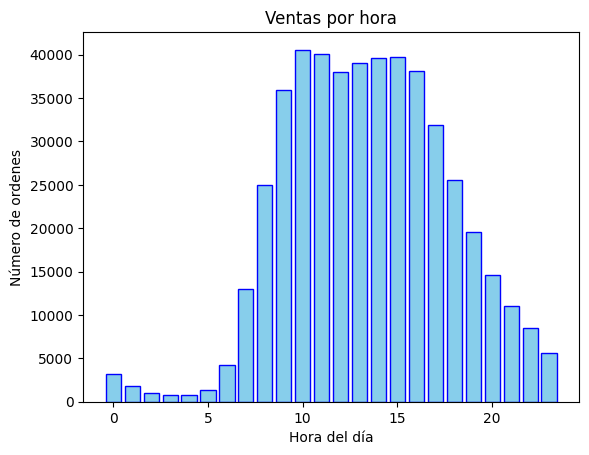

In [63]:

plt.bar(instacart_orders_datos_grafica["order_hour_of_day"], instacart_orders_datos_grafica["order_dow"], color='skyblue', edgecolor='blue')
plt.xlabel("Hora del día")
plt.ylabel("Número de ordenes")
plt.title("Ventas por hora")
plt.show()

Descripción de hallazgos.

La gráfica nos indica que de las 23:00hrs a las 5:00hrs tienen un (promedio de 2,500 a 5,000 ordenes)apartir de las 5:00hrs  empieza la actividad fuerte de ventas hasta llegar a su punto maximo de las 10:00hrs a las 17:00hrs (entre 37,000 a 40,000 ordenes), despúes empiezan a bajar las gradualmente las ventas hasta llegar nuevamente a las 23:00hrs 

### [A3] ¿Qué día de la semana compran víveres las personas?

In [64]:
instacart_orders_datos_grafica = df_instacart_orders.groupby("order_dow")["order_hour_of_day"].count().reset_index()
instacart_orders_datos_grafica

,order_dow,order_hour_of_day
0,0,84090
1,1,82185
2,2,65833
3,3,60897
4,4,59810
5,5,63488
6,6,62649


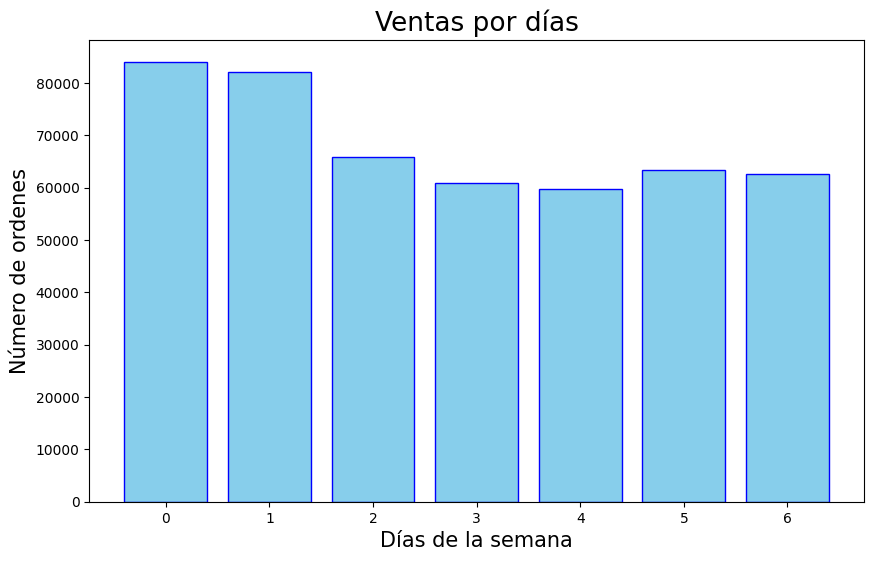

In [65]:
plt.figure(figsize=(10, 6))

plt.bar(instacart_orders_datos_grafica["order_dow"], instacart_orders_datos_grafica["order_hour_of_day"], color='skyblue', edgecolor='blue')
plt.ylabel("Número de ordenes", fontsize =15)
plt.xlabel("Días de la semana", fontsize= 15)
plt.title("Ventas por días", fontsize= 19)
plt.show()


Descripción de hallazgos.

Los Días de mayor venta son los domingos y lunes con un promedio de ordenes de (84000 a 82185), el martes con un promedio de 65833, los días de ventas más bajos son el miércoles(60912) y jueves (59810), recuperandose un poco los viernes y sabádos (63488 y 62649)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?  valores mínimos y máximos.

In [66]:
df_instacart_orders["days_since_prior_order"].min()

0.0

In [67]:
df_instacart_orders_filtered = df_instacart_orders[df_instacart_orders["days_since_prior_order"] < 30]

df_instacart_orders_filtered["days_since_prior_order"].max()


29.0

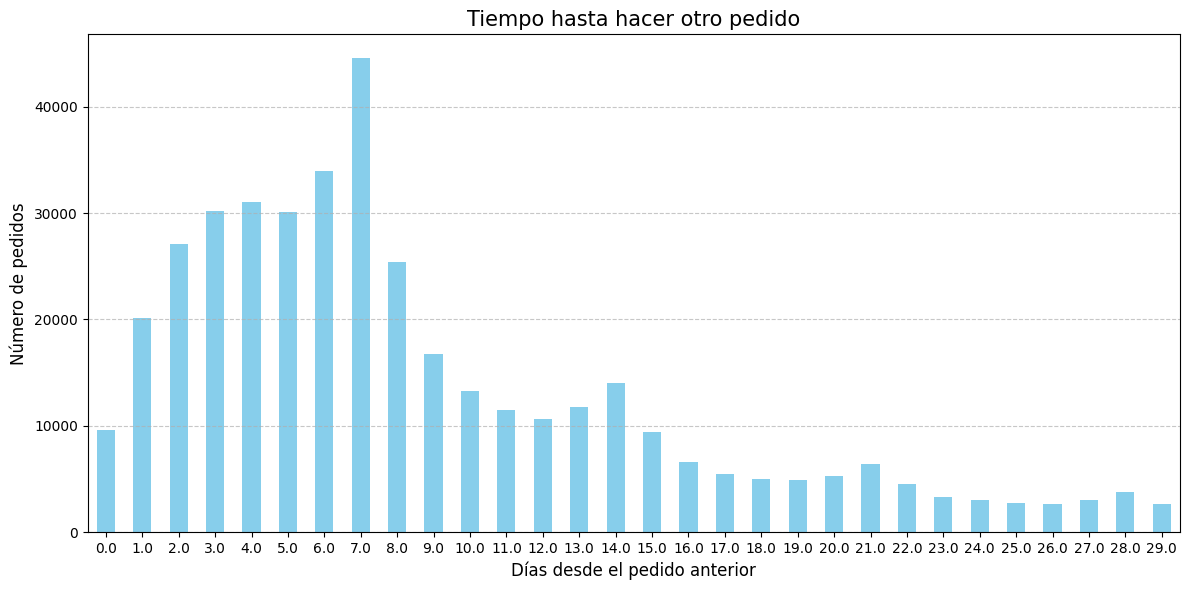

In [68]:
plt.figure(figsize=(12, 6))
df_instacart_orders_filtered["days_since_prior_order"].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Etiquetas y título
plt.xlabel("Días desde el pedido anterior", fontsize=12)
plt.ylabel("Número de pedidos", fontsize=12)
plt.title("Tiempo hasta hacer otro pedido", fontsize=15)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Descripción de hallazgos.

Los datos nos arrojan que las personas esperan un minimo de 0 días, eso quiere decir que compran todos los días.

por otro lado tenemos personas que esperan 30 días para volver a comprar.

# [B] Se realizó una complementación con el objetivo de responder las siguientes preguntas.

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

In [69]:
instacart_orders_sabado = df_instacart_orders[(df_instacart_orders["order_dow"]==3) | (df_instacart_orders["order_dow"]==6)]
instacart_orders_sabado

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
6,2511640,148233,40,3,8,2.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
16,3109465,55090,19,3,15,9.0
...,...,...,...,...,...,...
478954,984024,47076,2,6,21,6.0
478956,640934,27104,9,3,10,6.0
478961,3006133,34561,7,6,10,30.0
478963,3270802,112087,2,3,13,6.0


In [70]:
dia_miercoles= instacart_orders_sabado[instacart_orders_sabado["order_dow"]== 3].groupby("order_hour_of_day")["order_id"].count().reset_index()
dia_miercoles


,order_hour_of_day,order_id
0,0,373
1,1,215
2,2,106
3,3,101
4,4,108
5,5,170
6,6,643
7,7,1732
8,8,3125
9,9,4490


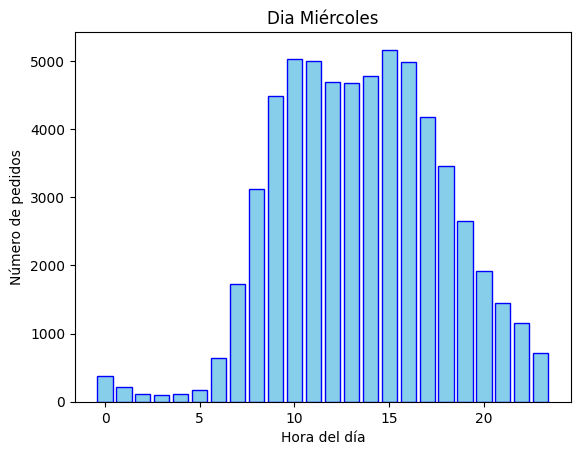

In [71]:
plt.bar(dia_miercoles["order_hour_of_day"], dia_miercoles["order_id"], color='skyblue', edgecolor='blue')
         
plt.title("Dia Miércoles")
    
plt.ylabel("Número de pedidos")
plt.xlabel("Hora del día")
plt.show()


In [72]:
dia_sabado= instacart_orders_sabado[instacart_orders_sabado["order_dow"]== 6].groupby("order_hour_of_day")["order_id"].count().reset_index()
dia_sabado


,order_hour_of_day,order_id
0,0,464
1,1,254
2,2,177
3,3,125
4,4,118
5,5,161
6,6,451
7,7,1619
8,8,3246
9,9,4311


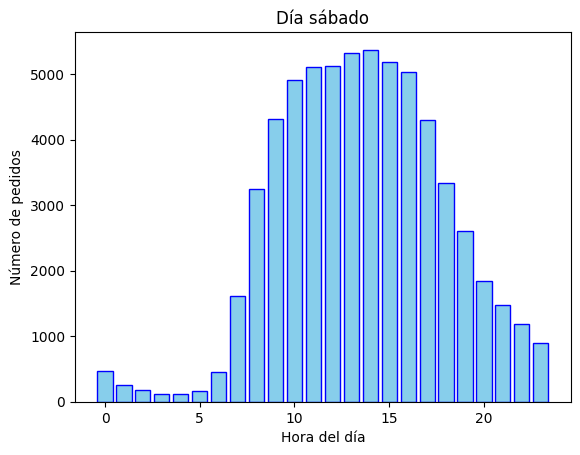

In [73]:
plt.bar(dia_sabado["order_hour_of_day"], dia_sabado["order_id"], color='skyblue', edgecolor='blue')
         
plt.title("Día sábado")
    
plt.ylabel("Número de pedidos")
plt.xlabel("Hora del día")
plt.show()


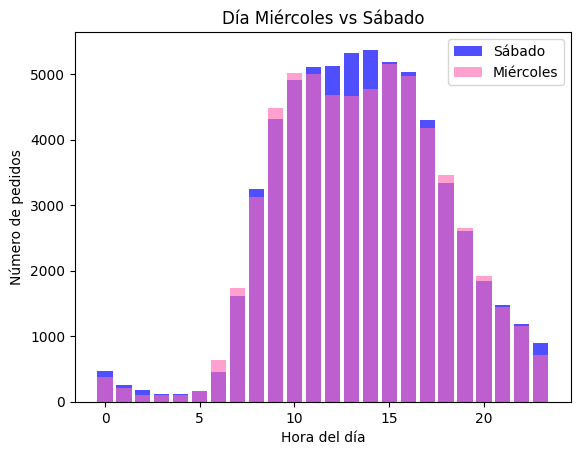

In [74]:
plt.bar(dia_sabado["order_hour_of_day"], dia_sabado["order_id"], alpha= 0.69,  color = "blue",label="Sábado")
plt.bar(dia_miercoles["order_hour_of_day"], dia_miercoles["order_id"], alpha=0.63, color= "hotpink", label="Miércoles")

         
plt.title("Día Miércoles vs Sábado")
plt.xlabel("Hora del día")
plt.ylabel("Número de pedidos")
plt.legend()

plt.show()


Descripción de hallazgos.

Las 2 gráficas del día mircoles y sábado son muy parecidas de las 12:00am a las 5:00am con una cantidad menor a 1000 pedidos, teniendo como punto más bajo entre las 3:00am a las 4:00am, apartir de las 6:00am empieza un crecimiento de ventas, hasta llegar a sus meyores ventas entre las 9:00am y las 4:00pm al rededor de 5,000 pedidos, después de las 5:00pm empieza a bajar el número de pedidos, hasta las 11:00pm con un promedio menor a 1000 pedidos 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [75]:
instacart_orders_distribucion= df_instacart_orders.groupby("order_number")[["order_id", "user_id"]].count().reset_index()

instacart_orders_distribucion

,order_number,order_id,user_id
0,1,28817,28817
1,2,28633,28633
2,3,28685,28685
3,4,28703,28703
4,5,25661,25661
...,...,...,...
95,96,220,220
96,97,221,221
97,98,191,191
98,99,169,169


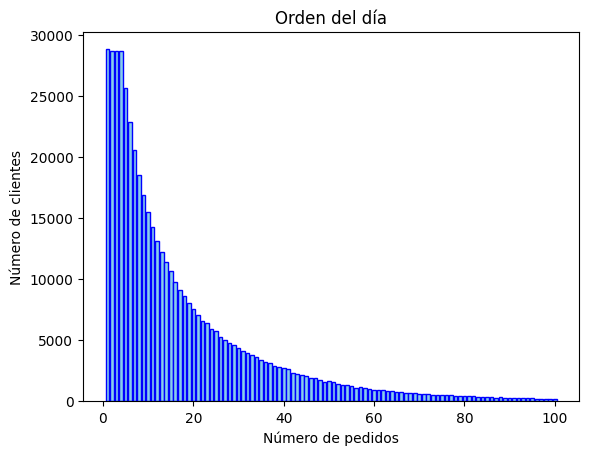

In [76]:
plt.bar(instacart_orders_distribucion["order_number"], instacart_orders_distribucion["order_id"], color='skyblue', edgecolor='blue')
#plt.bar(instacart_orders_distribucion['order_id'], instacart_orders_distribucion["order_id"], color="blue")
#plt.hist(instacart_orders_distribucion['order_id'], bins=20, color="blue")  

plt.title("Orden del día")

plt.xlabel("Número de pedidos")
plt.ylabel("Número de clientes")

plt.show()

Descripción de hallazgos.

A partir de 10 pedidos, la cantidad de clientes comienza a disminuir, lo que indica que hay menos usuarios que realizan pedidos con una frecuencia alta



### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [77]:
df_order_products.groupby("product_id")["order_id"].count()

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64

In [78]:
df_order_products_id = df_order_products.groupby("product_id")["order_id"].count().sort_values(ascending=False).iloc[0:20]
print(df_order_products_id)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: order_id, dtype: int64


In [79]:
df_order_products_id = df_order_products_id.reset_index()

top_20_productos = df_order_products_id.merge(df_products, on= "product_id")

print(top_20_productos[["product_id", "order_id", "product_name"]])

    product_id  order_id              product_name
0        24852     66050                    BANANA
1        13176     53297    BAG OF ORGANIC BANANAS
2        21137     37039      ORGANIC STRAWBERRIES
3        21903     33971      ORGANIC BABY SPINACH
4        47209     29773      ORGANIC HASS AVOCADO
5        47766     24689           ORGANIC AVOCADO
6        47626     21495               LARGE LEMON
7        16797     20018              STRAWBERRIES
8        26209     19690                     LIMES
9        27845     19600        ORGANIC WHOLE MILK
10       27966     19197       ORGANIC RASPBERRIES
11       22935     15898      ORGANIC YELLOW ONION
12       24964     15292            ORGANIC GARLIC
13       45007     14584          ORGANIC ZUCCHINI
14       39275     13879       ORGANIC BLUEBERRIES
15       49683     13675            CUCUMBER KIRBY
16       28204     12544        ORGANIC FUJI APPLE
17        5876     12232             ORGANIC LEMON
18        8277     11993  APPLE

In [80]:
#Top_20_productos.merge(df_products, on= "product_id") [["product_id", "order_id", "product_name"]]

Descripción de hallazgos.

Los 20 productos más populares son alimentos son organicos.


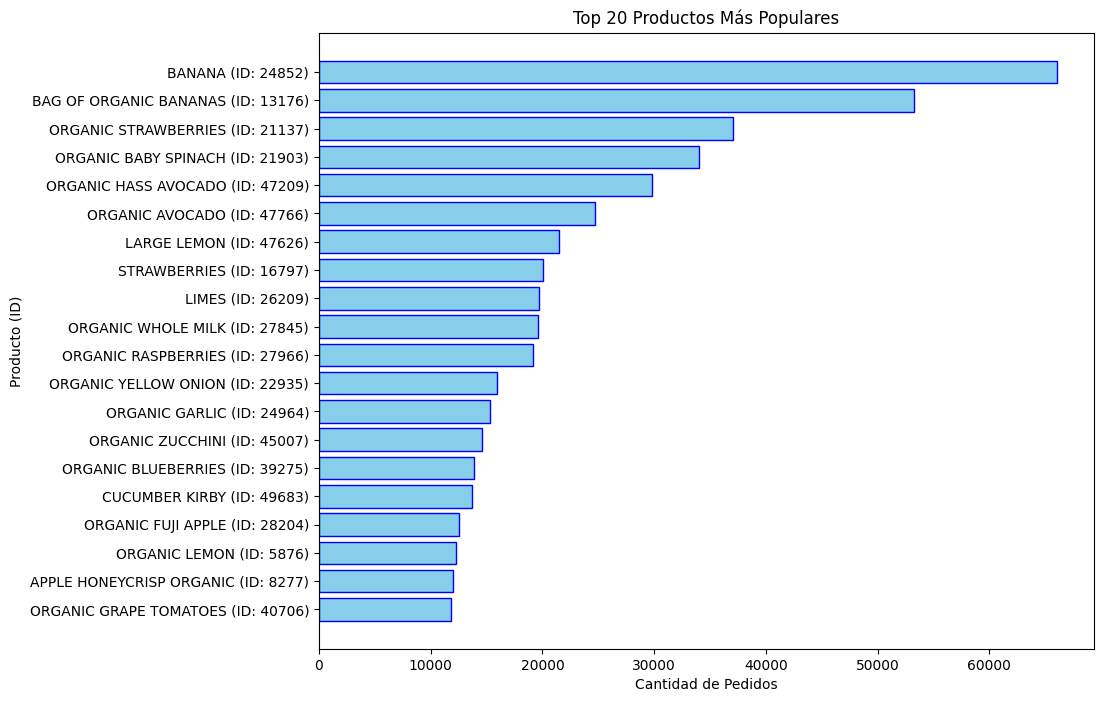

In [81]:

plt.figure(figsize=(10, 8))

plt.barh(top_20_productos["product_name"] + " (ID: " + top_20_productos["product_id"].astype(str) + ")", top_20_productos["order_id"], color='skyblue', edgecolor="blue")
plt.xlabel('Cantidad de Pedidos')
plt.ylabel('Producto (ID)')
plt.title('Top 20 Productos Más Populares')
plt.gca().invert_yaxis()  # Invertir el eje y para que los productos más populares estén arriba
plt.show()



# [C] Se plantearon las siguientes preguntas:

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [82]:
#df_order_products.groupby("order_id")["product_id"].count()
items_order = df_order_products.groupby("order_id")["product_id"].count()
print(items_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [83]:
mean_order= items_order.mean()
print(mean_order)

10.098983215049127


In [84]:
#df_order_products.groupby("order_id")["product_id"].count().std() #std dato mas cencano del promedio
std_order = items_order.std()

print(std_order)

7.540206471179234


Descripción de hallazgos.

Las personas suelen comprar 10 Articulos, con una desviacion estandar de 7.5

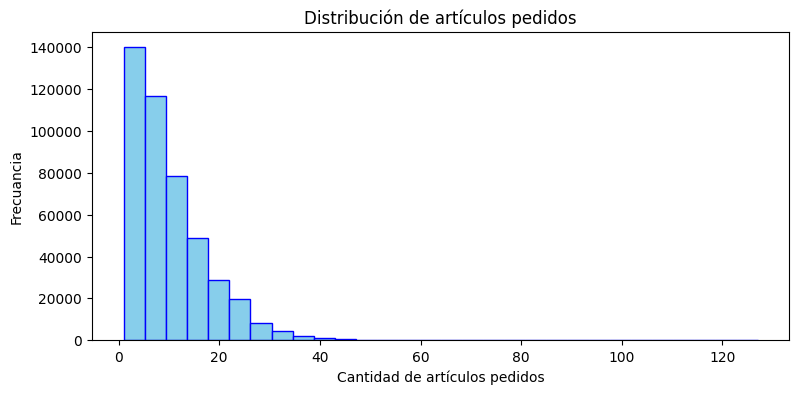

In [85]:
plt.figure(figsize = (9,4))
plt.hist(items_order, bins=30, color="skyblue", edgecolor="blue")
plt.xlabel("Cantidad de artículos pedidos")
plt.ylabel("Frecuancia")
plt.title ("Distribución de artículos pedidos")

plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [86]:
df_order_products.groupby("product_id")["reordered"].sum().nlargest(20)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: reordered, dtype: int64

In [87]:
ordenes_clientes = df_order_products.merge(df_instacart_orders, on="order_id")
ordenes_clientes

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,2141543,31869,15,1,58454,25,0,15,8.0
2,2141543,30233,9,1,58454,25,0,15,8.0
3,2141543,27966,20,1,58454,25,0,15,8.0
4,2141543,13176,2,1,58454,25,0,15,8.0
...,...,...,...,...,...,...,...,...,...
4545002,1790509,43739,1,1,60894,9,2,21,18.0
4545003,1274005,38275,1,1,32958,7,5,17,1.0
4545004,812418,46149,1,1,130466,34,1,14,0.0
4545005,2666881,196,1,1,33946,12,1,8,17.0


In [88]:
ordenes_clientes.groupby("product_id")["order_id"].count()

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64

In [89]:

merged_df = ordenes_clientes.merge(df_products, on="product_id")

# Agrupar los productos según el usuario y seleccionar los primeros 20 para cada uno
top_20_por_cliente = merged_df.groupby("user_id")["product_name"].apply(lambda x: x.head(20)).reset_index()

# Mostrar los primeros 20 productos por cliente con sus nombres
print(top_20_por_cliente.head(20))



    user_id  level_1                              product_name
0         2    20068                       ORGANIC RASPBERRIES
1         2    59693                    BAG OF ORGANIC BANANAS
2         2   109606                       ORGANIC GALA APPLES
3         2   255689                      ORGANIC HASS AVOCADO
4         2   264459                            PLANTAIN CHIPS
5         2   433810                          HONEYCRISP APPLE
6         2   524572                                    BANANA
7         2   576052                                  PAD THAI
8         2   712998                           ORGANIC AVOCADO
9         2   917346                      UNCURED GENOA SALAMI
10        2  1549677                           ORIGINAL HUMMUS
11        2  1879240                            ROASTED TURKEY
12        2  2060496   THIN STACKERS BROWN RICE LIGHTLY SALTED
13        2  2160681                   HOMMUS CLASSIC ORIGINAL
14        2  2524255     ORGANIC ROASTED SLICED CHICKEN

In [90]:
top_20_por_cliente.groupby("product_name")["user_id"].count().sort_values(ascending=False).head(20)


product_name
BANANA                      59397
BAG OF ORGANIC BANANAS      53247
ORGANIC BABY SPINACH        33125
ORGANIC HASS AVOCADO        27449
LARGE LEMON                 19599
STRAWBERRIES                19501
ORGANIC RASPBERRIES         19196
ORGANIC AVOCADO             19088
ORGANIC STRAWBERRIES        18963
LIMES                       15119
ORGANIC GARLIC              15080
ORGANIC ZUCCHINI            14445
ORGANIC FUJI APPLE          11588
ORGANIC LEMON               11534
SEEDLESS RED GRAPES         11112
ORGANIC YELLOW ONION        11009
ORGANIC BLUEBERRIES         10551
APPLE HONEYCRISP ORGANIC    10247
HONEYCRISP APPLE            10133
ORGANIC GALA APPLES         10097
Name: user_id, dtype: int64

Descripción de hallazgos.

Los productos orgánicos y frescos son compras repetidas por los clientes, lo que cual es un buen indicador por lo que se suguiere tener abastecidos estos productos.


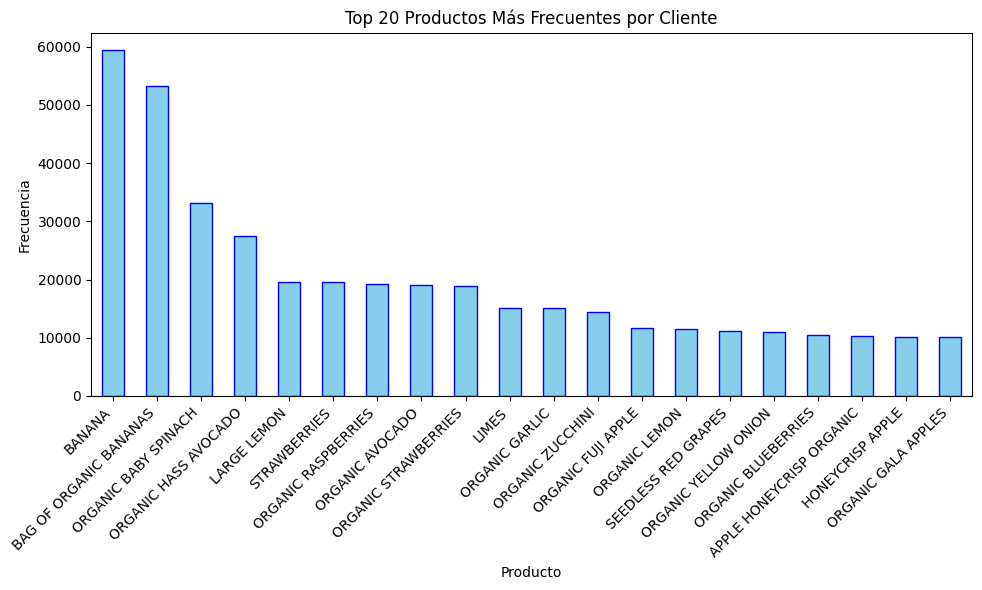

In [91]:

# Contar la frecuencia de cada producto y ordenar los resultados
frecuencia_productos = top_20_por_cliente['product_name'].value_counts().sort_values(ascending=False)

# Tomar los 20 productos más frecuentes
top_20_productos = frecuencia_productos.head(20)


plt.figure(figsize=(10, 6))
top_20_productos.plot(kind='bar', color='skyblue', edgecolor= "blue")
plt.title('Top 20 Productos Más Frecuentes por Cliente')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres 
plt.tight_layout()  
plt.show()


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [92]:
# Se calculó la frecuencia de pedido para cada producto
frecuencia_pedido = df_order_products["product_id"].value_counts()

# Se calculó la frecuencia de repetición para cada producto
frecuencia_repetición = df_order_products[df_order_products["reordered"] == 1]["product_id"].value_counts()
print(frecuencia_repetición)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64


In [93]:
# Se realizó las series en un DataFrame


df_frecuencia = pd.DataFrame({"frecuencia_pedido": frecuencia_pedido, "frecuencia_repetición": frecuencia_repetición}).fillna(0)
df_frecuencia


,frecuencia_pedido,frecuencia_repetición
1,280,158.0
2,11,0.0
3,42,31.0
4,49,25.0
7,2,1.0
...,...,...
49690,5,4.0
49691,72,31.0
49692,12,5.0
49693,25,11.0


In [94]:
# Se calculó la proporción
df_frecuencia["proporcion_repetición"] = df_frecuencia["frecuencia_repetición"] / df_frecuencia["frecuencia_pedido"]
print(df_frecuencia)

       frecuencia_pedido  frecuencia_repetición  proporcion_repetición
1                    280                  158.0               0.564286
2                     11                    0.0               0.000000
3                     42                   31.0               0.738095
4                     49                   25.0               0.510204
7                      2                    1.0               0.500000
...                  ...                    ...                    ...
49690                  5                    4.0               0.800000
49691                 72                   31.0               0.430556
49692                 12                    5.0               0.416667
49693                 25                   11.0               0.440000
49694                  9                    3.0               0.333333

[45573 rows x 3 columns]


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [95]:
# Combinar las tablas order_products e instacart_orders
orders_products = df_order_products.merge(df_instacart_orders, on="order_id")

# Calcular el número de productos repetidos por cliente
repeated_products = orders_products[orders_products["reordered"] == 1]["user_id"].value_counts()

# Calcular el número total de productos pedidos por cliente
total_products = orders_products["user_id"].value_counts()

# Calcular la proporción de productos repetidos por cliente
proportion_repeated = repeated_products / total_products

# Mostrar los resultados
print(proportion_repeated)


2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: user_id, Length: 149626, dtype: float64


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [96]:
merged_df = df_order_products.merge(df_products, on="product_id")

order_counts = merged_df.groupby(['order_id', 'product_id']).size().reset_index(name='count')
order_counts

,order_id,product_id,count
0,4,10054,1
1,4,17616,1
2,4,21351,1
3,4,22598,1
4,4,25146,1
...,...,...,...
4524190,3421077,26940,1
4524191,3421077,27845,1
4524192,3421077,27966,1
4524193,3421077,45007,1


In [97]:
sorted_products = order_counts.groupby('product_id')['count'].sum().sort_values(ascending=False).reset_index()

top_20_products = sorted_products.head(20).merge(df_products, on='product_id')
top_20_products

,product_id,count,product_name,aisle_id,department_id
0,24852,66050,BANANA,24,4
1,13176,53297,BAG OF ORGANIC BANANAS,24,4
2,21137,37039,ORGANIC STRAWBERRIES,24,4
3,21903,33971,ORGANIC BABY SPINACH,123,4
4,47209,29773,ORGANIC HASS AVOCADO,24,4
5,47766,24689,ORGANIC AVOCADO,24,4
6,47626,21495,LARGE LEMON,24,4
7,16797,20018,STRAWBERRIES,24,4
8,26209,19690,LIMES,24,4
9,27845,19600,ORGANIC WHOLE MILK,84,16


In [98]:
print(top_20_products[['product_id', 'product_name', 'count']])



    product_id              product_name  count
0        24852                    BANANA  66050
1        13176    BAG OF ORGANIC BANANAS  53297
2        21137      ORGANIC STRAWBERRIES  37039
3        21903      ORGANIC BABY SPINACH  33971
4        47209      ORGANIC HASS AVOCADO  29773
5        47766           ORGANIC AVOCADO  24689
6        47626               LARGE LEMON  21495
7        16797              STRAWBERRIES  20018
8        26209                     LIMES  19690
9        27845        ORGANIC WHOLE MILK  19600
10       27966       ORGANIC RASPBERRIES  19197
11       22935      ORGANIC YELLOW ONION  15898
12       24964            ORGANIC GARLIC  15292
13       45007          ORGANIC ZUCCHINI  14584
14       39275       ORGANIC BLUEBERRIES  13879
15       49683            CUCUMBER KIRBY  13675
16       28204        ORGANIC FUJI APPLE  12544
17        5876             ORGANIC LEMON  12232
18        8277  APPLE HONEYCRISP ORGANIC  11993
19       40706    ORGANIC GRAPE TOMATOES

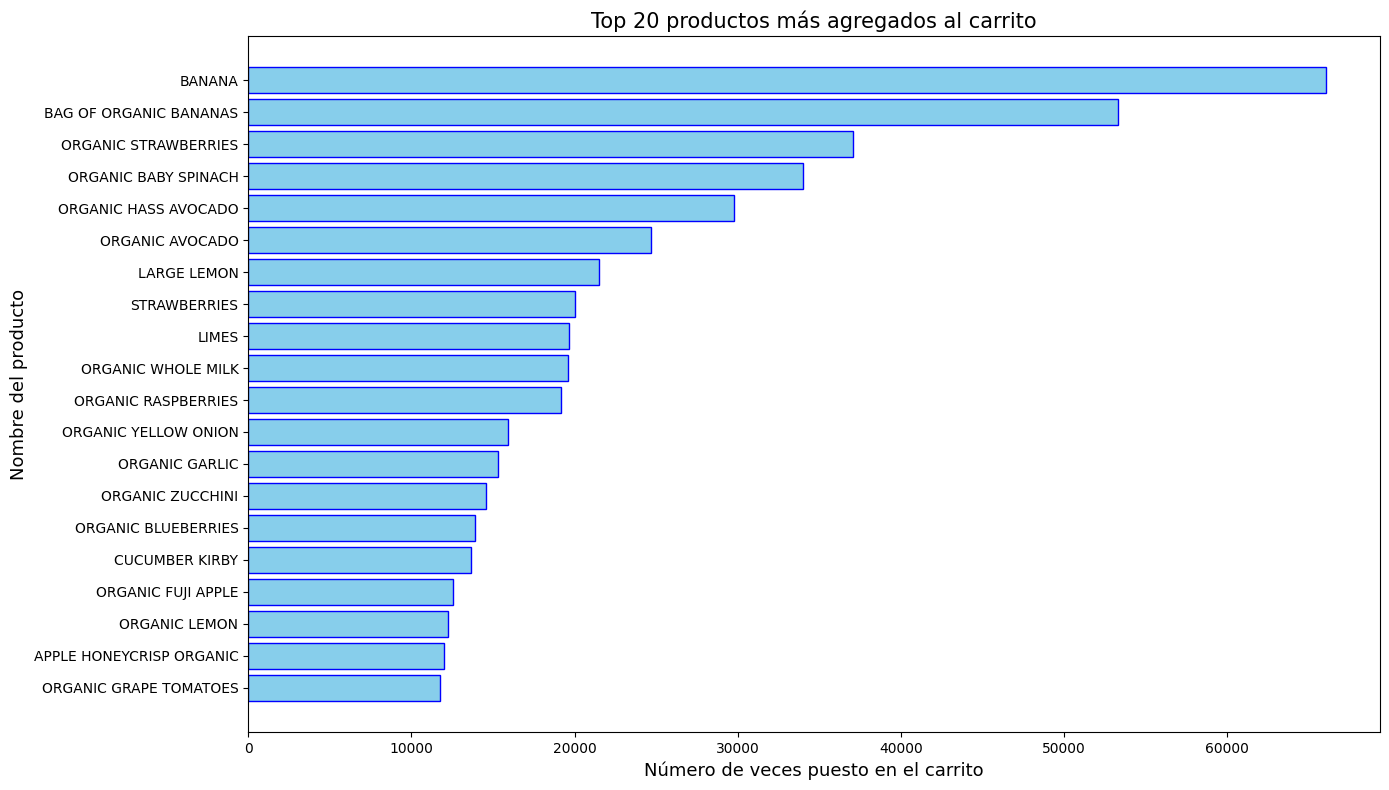

In [99]:

plt.figure(figsize=(14, 8))
plt.barh(top_20_products['product_name'], top_20_products['count'], color='skyblue', edgecolor='blue')

plt.gca().invert_yaxis()


plt.xlabel('Número de veces puesto en el carrito', fontsize=13)
plt.ylabel('Nombre del producto', fontsize=13)
plt.title('Top 20 productos más agregados al carrito', fontsize=15)

plt.tight_layout()


plt.show()


Descripción de hallazgos.

Los productos que los clientes a menudo añaden primero a su carrito incluyen una variedad de artículos, desde productos frescos como frutas y verduras, hasta productos de conveniencia y alimentos preparados.

Los 20 principales artículos que las personas ponen primero en sus carritos incluyen:
        Bag of Ice
        Iced Coffee Lightly Sweet
        Cafe Latte Pure Lightly Sweetened Iced Coffee
        Organic Red Onion
        Bananas
        Organic Avocado
        Fresh Cauliflower
        Shredded Chicken
        Peach Pure Body Immune Support Blend
        Entre otros.

### Conclusión general del proyecto:

Los 20 productos más populares

Los productos más populares incluyen principalmente alimentos frescos y orgánicos. Esto sugiere que los clientes prefieren
productos saludables y de calidad.


Días que más compran:
Días que más se venden es domigo y lunes

Días con pocas ventas
miércoles y sábado

Artículos que se Vuelven a Pedir con Más Frecuencia

Los artículos que se vuelven a pedir con más frecuencia incluyen productos frescos y de uso diario. 
Esto sugiere que estos productos son primordiales y preferidos por los clientes.

Con todos los datos anteriores y junto con el equipo de marketing se puden crear campañas dirigidas.

Ejemplo: Para introducir y dar a conocer promociones se pueden realzar los días domigo y lunes que son los días que más 
gente va a la tienda.

Y para elevar las ventas los días miércoles y sábados ejemplo: se puede hacer una promociones con los 20 productos más 
vendidos para genera más flujo de ventas.

Con los artículos que piden con más frecuencia crear campañas de fidelización del Cliente, existe una alta probabilidad 
de que vuelvan apedir esos articulos, lo cual indica una satisfacción y fidelización significativa.

Entender esta distribución es fundamental para diseñar estrategias de marketing efectivas. Por ejemplo, podríamos 
personalizar ofertas y promociones para incentivar a los clientes ocasionales a realizar más pedidos o para mantener a los 
clientes frecuentes comprometidos con el servicio.

Por ultimo por ejemplo, los clientes que realizan menos de 5 pedidos pueden ser el foco de campañas para aumentar la 
frecuencia de compra, mientras que los clientes con más de 10 pedidos podrían ser objeto de programas de fidelización.
